In [88]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [89]:
# Show the amount of missing data in each column in the training set
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# REPLACING MISSING DATA WITH APPROPRIATE "DATA_DESCRIPTION"-VALUES

In [90]:
# Fill NAN values of "Alley" with "No Alley"
train_set.Alley.fillna('No Alley', inplace=True)


# Fill NAN values of "BmstQual" with "No Basement"
train_set.BsmtQual.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtCond" with "No Basement"
train_set.BsmtCond.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtExposure" with "No Basement"
train_set.BsmtExposure.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtFinType1" with "No Basement"
train_set.BsmtFinType1.fillna('No Basement', inplace=True)


# Fill NAN values of "BsmtFinType2" with "No Basement"
train_set.BsmtFinType2.fillna('No Basement', inplace=True)


# Fill NAN values of "FireplaceQu" with "No Fireplace"
train_set.FireplaceQu.fillna('No Fireplace', inplace=True)


# Fill NAN values of "GarageType" with "No Garage"
train_set.GarageType.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageFinish" with "No Garage"
train_set.GarageFinish.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageQual" with "No Garage"
train_set.GarageQual.fillna('No Garage', inplace=True)


# Fill NAN values of "GarageCond" with "No Garage"
train_set.GarageCond.fillna('No Garage', inplace=True)


# Fill NAN values of "PoolQC" with "No Pool"
train_set.PoolQC.fillna('No Pool', inplace=True)


# Fill NAN values of "Fence" with "No Fence"
train_set.Fence.fillna('No Fence', inplace=True)


# Fill NAN values of "MiscFeature" with "No MiscFeature"
train_set.MiscFeature.fillna('No MiscFeature', inplace=True)

In [91]:
# Show the amount of missing data in each column in the training set
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# ##### REMOVING COLUMNS WITH MORE THAN 10% MISSING DATA

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Store all columns with more than 10% missing data in a list
missing_columns = [col for col in train_set.columns if train_set[col].isnull().sum() / len(train_set) > 0.1]

# Remove all columns with more than 10% missing data if the column is not the target column
train_set.dropna(axis=1, thresh=len(train_set) * 0.9, inplace=True)

train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [93]:
from collections import Counter

# Get numerical columns from train set
numerical_cols = train_set.select_dtypes(include=['int64', 'float64']).columns

# Use Heuristic Imputer to fill missing values in numerical columns
imp = IterativeImputer(max_iter=5, random_state=0)
imp.fit(train_set[numerical_cols])
train_set[numerical_cols] = imp.transform(train_set[numerical_cols])

In [94]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns


# Fill in the missing data in the training set of categorical columns with the most common value in the column
for col in categorical_cols:
    train_set[col].fillna(train_set[col].value_counts().index[0], inplace=True)
train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [95]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_set[categorical_cols] = ordinal_encoder.fit_transform(train_set[categorical_cols])

train_set

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,7917.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,1457.0,20.0,3.0,13175.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,1.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,1458.0,70.0,3.0,9042.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,3.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,1459.0,20.0,3.0,9717.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,4.0,2010.0,8.0,4.0,142125.0


In [96]:
useless = ['GarageYrBlt','YearRemodAdd']
train_set = train_set.drop(useless, axis = 1)

# Correlation matrix for train_set
corr_matrix = train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

# Create list of variables with correlation greater than 0.5 with SalePrice
corr_vars = [k for k in corr_matrix.index if corr_matrix['SalePrice'][k] > 0.4 or corr_matrix['SalePrice'][k] < -0.4]
# Remove SalePrice from corr_vars
corr_vars.remove('SalePrice')
corr_vars

['OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea']

      OverallQual  YearBuilt  MasVnrArea  ExterQual  BsmtQual  TotalBsmtSF  \
921           5.0     1900.0         0.0        3.0       4.0       1272.0   
520           4.0     1900.0         0.0        3.0       3.0          0.0   
401           7.0     2005.0         0.0        2.0       2.0       1310.0   
280           7.0     1989.0       340.0        2.0       2.0        807.0   
1401          6.0     2004.0         0.0        3.0       4.0        839.0   
...           ...        ...         ...        ...       ...          ...   
715           6.0     1974.0       174.0        3.0       2.0       1064.0   
905           5.0     1954.0       110.0        3.0       4.0       1056.0   
1096          6.0     1914.0         0.0        3.0       4.0        684.0   
235           6.0     1971.0       604.0        3.0       4.0        483.0   
1061          3.0     1935.0         0.0        1.0       4.0        894.0   

      HeatingQC  1stFlrSF  GrLivArea  FullBath  KitchenQual  To

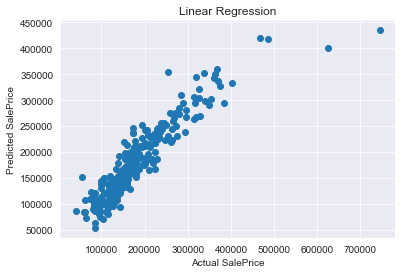

Multi linear regression: 
R2-score: 0.8333448820486806
MAE: 21701.216559606444
RMSE: 0.17917011469465374


In [97]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = train_set[corr_vars]
# Drop SalePrice from X
y = train_set['SalePrice']


# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train)
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions_linear_regression = linear_regression.predict(X_test)

# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_linear_regression)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_test, predictions_linear_regression))
print("MAE:", mean_absolute_error(y_test, predictions_linear_regression))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_linear_regression)

print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))

[12:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




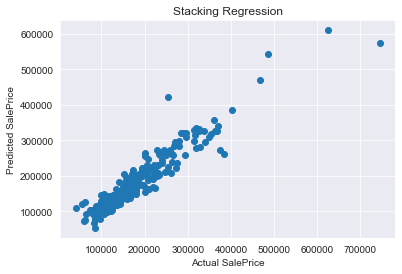

XGB Regression: 
R2-score: 0.8967938271597475
MAE: 17846.791082512842
RMSE: 0.15625400643964782


In [98]:
from mlxtend.regressor import StackingCVRegressor
import catboost as cb
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, HuberRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01,
                   max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                   loss = "huber", max_features = "sqrt", random_state = 1)
xgb_model = xgb.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_xgb)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Stacking Regression')
plt.show()


print("XGB Regression: ")
print("R2-score:", r2_score(y_test, predictions_xgb))
print("MAE:", mean_absolute_error(y_test, predictions_xgb))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_xgb)

print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))

0:	learn: 77632.7607259	total: 3.99ms	remaining: 3.99s
1:	learn: 77264.2683454	total: 5.29ms	remaining: 2.64s
2:	learn: 76846.7989868	total: 6.4ms	remaining: 2.13s
3:	learn: 76416.2947034	total: 7.34ms	remaining: 1.83s
4:	learn: 76017.8608751	total: 8.27ms	remaining: 1.65s
5:	learn: 75627.2114844	total: 9.16ms	remaining: 1.52s
6:	learn: 75190.6577177	total: 10.2ms	remaining: 1.44s
7:	learn: 74766.8625158	total: 11.3ms	remaining: 1.4s
8:	learn: 74346.7050866	total: 12.3ms	remaining: 1.35s
9:	learn: 73922.5774747	total: 13.3ms	remaining: 1.32s
10:	learn: 73519.7138521	total: 14.3ms	remaining: 1.28s
11:	learn: 73131.9277634	total: 15.6ms	remaining: 1.28s
12:	learn: 72728.8753000	total: 17.3ms	remaining: 1.32s
13:	learn: 72333.5407621	total: 18.2ms	remaining: 1.28s
14:	learn: 71965.7001988	total: 19.2ms	remaining: 1.26s
15:	learn: 71580.1818298	total: 20.2ms	remaining: 1.24s
16:	learn: 71229.2604412	total: 21.2ms	remaining: 1.23s
17:	learn: 70835.5967721	total: 22.2ms	remaining: 1.21s
18:	

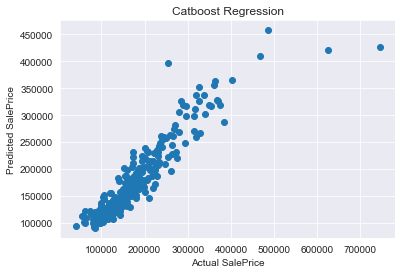

Catboost Regression: 
R2-score: 0.8444814416617661
MAE: 19389.824872480054
RMSE: 0.16715521450117396


In [167]:
# Catboost Regression
catboost_regressor = cb.CatBoostRegressor(iterations=1000, learning_rate=0.01,
                                          depth=5, l2_leaf_reg=16,
                                          loss_function='RMSE',
                                          eval_metric='RMSE',
                                          bagging_temperature=0.1,
                                          random_seed=11)
catboost_regressor.fit(X_train, y_train)
predictions_catboost = catboost_regressor.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_catboost)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Catboost Regression')
plt.show()


print("Catboost Regression: ")
print("R2-score:", r2_score(y_test, predictions_catboost))
print("MAE:", mean_absolute_error(y_test, predictions_catboost))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_catboost)


print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))


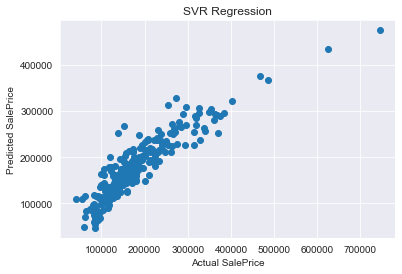

SVR Regression: 
R2-score: 0.8031843885595668
MAE: 24227.93709559905
RMSE: 0.19151770953742267


In [54]:


svr_model = SVR(kernel='linear', C=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('SVR Regression')
plt.show()


print("SVR Regression: ")
print("R2-score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_validation = np.log(y_test)
log_y_pred = np.log(y_pred)


print("RMSE:", sqrt(mean_squared_error(log_y_validation, log_y_pred)))

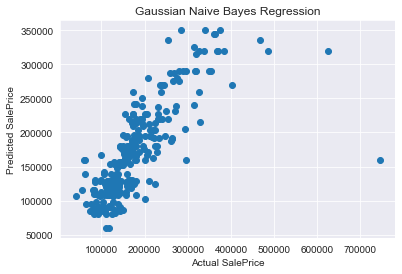

Gaussian Naive Bayes Regression: 
R2-score: 0.5937308410652986
MAE: 29868.513698630137
RMSE: 0.25693683585932736


In [169]:
# Gaussian Naive Bayes Regression
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_gnb = gnb.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_gnb)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Gaussian Naive Bayes Regression')
plt.show()


print("Gaussian Naive Bayes Regression: ")
print("R2-score:", r2_score(y_test, predictions_gnb))
print("MAE:", mean_absolute_error(y_test, predictions_gnb))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_gnb)


print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
predictions_lasso = lasso.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_lasso)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Lasso Regression')
plt.show()


print("Lasso Regression: ")
print("R2-score:", r2_score(y_test, predictions_lasso))
print("MAE:", mean_absolute_error(y_test, predictions_lasso))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_lasso)


print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[11:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[11:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:56:39] WARNING: C:/Users/Administrator/workspace/xgboost

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


[11:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


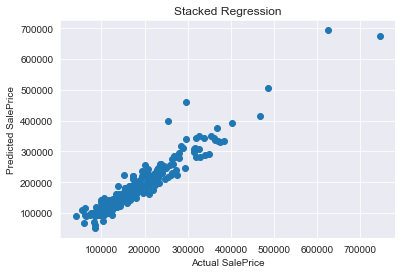

Stacked Regression: 
R2-score: 0.9138370342136211
MAE: 16676.930811215752
RMSE: 0.14746676292431332


In [55]:
# Create Stacked Model using XGBoost, Linear Regression
stacked_model = StackingCVRegressor(regressors=[xgb_model, linear_regression, svr_model],
                                   meta_regressor=xgb_model,
                                   use_features_in_secondary=True,
                                   verbose=2)
stacked_model.fit(X_train, y_train)
predictions_stacked_model = stacked_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_stacked_model)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Stacked Regression')
plt.show()


print("Stacked Regression: ")
print("R2-score:", r2_score(y_test, predictions_stacked_model))
print("MAE:", mean_absolute_error(y_test, predictions_stacked_model))


# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_stacked_model)


print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))

In [56]:
# Remove all columns in missing_cols from train_set
#test_set.drop(missing_columns, axis=1, inplace=True)
test_set.isnull().sum()

# List of all categorical columns
categorical_columns = [col for col in test_set.columns if test_set[col].dtype == 'object']

print('Categorical columns:', categorical_columns)

# Print amount of missing data for each column
print('Missing data per column:')
print(test_set.isnull().sum() / len(test_set))

#-------------------------------------- Filling Missing Values --------------------------------------------------#

# Get numerical columns from train set
numerical_cols = test_set.select_dtypes(include=['int64', 'float64']).columns

# Use IterativeImputer to fill in the missing data in the training set of numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(test_set[numerical_cols])
test_set[numerical_cols] = imputer.transform(test_set[numerical_cols])
test_set.isnull().sum()

# Get categorical columns from train set
categorical_cols = test_set.select_dtypes(include=['object']).columns

# Fill in the missing data in the training set of categorical columns with the most common value in the column
for col in categorical_cols:
    test_set[col].fillna(test_set[col].value_counts().index[0], inplace=True)
test_set.isnull().sum()

# Get categorical columns from train set
categorical_cols = test_set.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
test_set[categorical_cols] = ordinal_encoder.fit_transform(test_set[categorical_cols])


#-------------------------------------- Feature Engineering --------------------------------------------------#

print(corr_vars)
print(test_set.columns)
print(len(predictions_xgb))
# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = test_set[corr_vars]

print(X_train)
# Stacked model

stacked = stacked_model.fit(np.array(X_train), np.array(y_train))
predictions_stacked = stacked.predict(X)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Missing data per column:
Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64
['OverallQual', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'Foun

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[11:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:57:08] WARNING: C:/Users/Administrator/workspace/xgboost

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


[11:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [57]:
submission = pd.DataFrame()
# Convert values of Id column to int64
submission["Id"] = test_set["Id"]
submission['Id'] = test_set['Id'].astype(int)
submission["SalePrice"] = predictions_stacked
submission.to_csv("submission.csv", index = False)
submission.head()

,Id,SalePrice
0,1461,132707.500000
1,1462,156667.843750
2,1463,179640.734375
3,1464,193920.406250
4,1465,188884.109375
